## 📦 Install Required Packages

In [14]:

%pip install kagglehub numpy pandas matplotlib seaborn ydata-profiling sweetviz dtale autoviz mysql-connector-python sqlalchemy


  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-core 0.1.53 requires packaging<24.0,>=23.2, but you have packaging 25.0 which is incompatible.
langchain-experimental 0.3.4 requires langchain-community<0.4.0,>=0.3.0, but you have langchain-community 0.0.38 which is incompatible.
langchain-experimental 0.3.4 requires langchain-core<0.4.0,>=0.3.28, but you have langchain-core 0.1.53 which is incompatible.
langchain-huggingface 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.1.53 which is incompatible.
langgraph-checkpoint 3.0.0 requires langchain-core>=0.2.38, but you have langchain-core 0.1.53 which is incompatible.
langgraph-prebuilt 1.0.2 requires langchain-core>=1.0.0, but you have langchain-core 0.1.53 which is incompatible.
langserve 0.3.1 requires langchain-core<0.4,>=0.3, but you have langchain-core 0.1.53 which is inco


# 📚 NumPy, Pandas, MySQL & EDA — Integrated Lecture Notebook

This single notebook integrates **Python recap**, **NumPy**, **Pandas**, **EDA (manual + automatic)**, and **SQL** in a logical order.



## Table of Contents
- [Python Recap](#python-recap)
- [Environment Check & Imports](#env)
- [NumPy Deep Dive](#numpy)
- [Pandas Essentials](#pandas)
- [Manual EDA](#eda-manual)
- [Automatic EDA](#eda-auto)
- [SQL in the Workflow](#sql)
- [Integration Project](#integration)
- [Wrap-up](#wrapup)


<a id="python-recap"></a>

# Python Recap

<a id="env"></a>

#### Environment Check & Imports


In [15]:
import sys, platform

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())


Python: 3.12.8
Platform: Windows-11-10.0.26200-SP0


In [16]:
# Core scientific stack
import numpy as np
import pandas as pd

# Viz (use matplotlib as base; seaborn optional)
import matplotlib.pyplot as plt

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)


NumPy: 1.26.4
Pandas: 2.3.1


## Collections

### List

In [17]:
basket_list = ['apple', 'orange', 'pear', 'pear', 'orange', 'banana']
print(basket_list)

['apple', 'orange', 'pear', 'pear', 'orange', 'banana']


In [18]:
basket_list[0] = 'pear'

In [19]:
basket_list

['pear', 'orange', 'pear', 'pear', 'orange', 'banana']

In [20]:
print(set(basket_list))

{'banana', 'pear', 'orange'}


In [21]:
basket_list = ['apple', 2, 'apple', 4.5,'orange', 'banana']
print(basket_list)

['apple', 2, 'apple', 4.5, 'orange', 'banana']


### Set

In [22]:
basket_set = ['apple', 'orange', 'apple', 'pear', 'orange', 'banana']
# set(basket_list)
print(basket_set)

['apple', 'orange', 'apple', 'pear', 'orange', 'banana']


In [23]:
set(basket_set)

{'apple', 'banana', 'orange', 'pear'}

In [24]:
tuple(basket_set)

('apple', 'orange', 'apple', 'pear', 'orange', 'banana')

### Tuples

In [25]:
t = (12345, 54321, 'hello!')
print(t[0])

12345


In [26]:
t=list(t)

In [27]:
t[0]=12

In [28]:
tuple(t)

(12, 54321, 'hello!')

t[0] = 12
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[5], line 1
----> 1 t[0] = 12

TypeError: 'tuple' object does not support item assignment



### Dctionary

In [29]:
tel = {'jack': 4098, 'sape': 4139}
tel['guido'] = 4127
print(tel)

{'jack': 4098, 'sape': 4139, 'guido': 4127}


## Python concepts – Memory Allocation

### Immutable Objects

In [30]:
a = 3

In [31]:
b = 3

In [32]:
print(id(a))

140730563176952


In [33]:
print(id(b))

140730563176952


In [34]:
print('a = ',a)
print('b = ',b)

a =  3
b =  3


In [35]:
a = 4
b = 3

In [36]:
print(id(a))

140730563176984


In [37]:
print(id(b))

140730563176952


In [38]:
print('a = ',a)
print('b = ',b)

a =  4
b =  3


In [39]:
b=5

In [40]:
print(id(b))

140730563177016


### Mutable Objects

In [41]:
a = [1,2,3]
b = a
print('a = ', a)
print('b = ', b)
b[0] = 'NewValue'
print('a = ', a)
print('b = ', b)

a =  [1, 2, 3]
b =  [1, 2, 3]
a =  ['NewValue', 2, 3]
b =  ['NewValue', 2, 3]


In [42]:
a = [1,2,3]
b = a
print('a = ', a)
print('b = ', b)
b = ['NewValue', 2, 3]
print('a = ', a)
print('b = ', b)

a =  [1, 2, 3]
b =  [1, 2, 3]
a =  [1, 2, 3]
b =  ['NewValue', 2, 3]


### Python – list comprehension 

In [43]:
squares = []
for x in range(10):
    squares.append(x**2)
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [44]:
squares = [x**2 for x in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


### Function definitions and use

In [45]:
def sqr(x):
    s = x**2
    return s

In [46]:
print(sqr(2))

4


### Strings

In [47]:
s = "dr\" Zvi ben ami"

In [48]:
s

'dr" Zvi ben ami'

In [49]:
s.replace('e','r')

'dr" Zvi brn ami'

In [50]:
print(s*2)

dr" Zvi ben amidr" Zvi ben ami


In [51]:
print(s+s)

dr" Zvi ben amidr" Zvi ben ami


In [52]:
print('allows embedded "double" quotes')
print("allows embedded 'single' quotes")
print("""Three 

single 


quotes""") 
print("""Three double '' " "' quotes""")

allows embedded "double" quotes
allows embedded 'single' quotes
Three 

single 


quotes
Three double '' " "' quotes


### Special characters

In [53]:
print("tab\tsign, \nnewline")

tab	sign, 
newline


### Raw string

In [54]:
print(r"C:\Users\zvi.b\Documents\Zvi\HUJI\Data Science 2024\Code\1. python_recap")

C:\Users\zvi.b\Documents\Zvi\HUJI\Data Science 2024\Code\1. python_recap


### Formated string

In [55]:
name = "Alice"
age = 25
greeting = f"My name is {name} and I am {age} years old."
print(greeting)

My name is Alice and I am 25 years old.


### String with input params

In [56]:
user = "zvi"
user1 ='ben'
print(f"user name {user} and bla bla {user1}")
print("user name {}".format(user))

user name zvi and bla bla ben
user name zvi


### Strings – concatenate iterable

In [57]:
s= (" ".join(['a', 'b', 'c']))

In [58]:
s

'a b c'

In [59]:
s.split()

['a', 'b', 'c']

### Strings – other methods

In [60]:
s = "Python is fun"
print(s.lower())
print(s.upper())
print("th" in s)
print(s.replace("fun", "great"))
print(s.split(sep=None, maxsplit=1))

python is fun
PYTHON IS FUN
True
Python is great
['Python', 'is fun']



<a id="numpy"></a>

## NumPy Overview

**Goals:**  
- Understand arrays vs. lists, broadcasting, vectorization, and basic linear algebra.


In [61]:

# Arrays vs Lists: quick speed comparison (conceptual)
import time
import numpy as np

lst = list(range(1_000_000))  # smaller to keep runtime quick in class
arr = np.array(lst)

t0 = time.time()
_ = sum(lst)
t_list = time.time() - t0

t0 = time.time()
_ = arr.sum()
t_np = time.time() - t0

print(f"Sum Python list: {t_list:.6f}s  |  Sum NumPy array: {t_np:.6f}s")


Sum Python list: 0.004134s  |  Sum NumPy array: 0.001001s


In [62]:

# Array creation
print(np.array([1,2,3]))
print(np.arange(0, 10, 2))
print(np.linspace(0, 1, 5))
print(np.zeros((2,3)))
print(np.random.randint(1, 10, (3,3)))


[1 2 3]
[0 2 4 6 8]
[0.   0.25 0.5  0.75 1.  ]
[[0. 0. 0.]
 [0. 0. 0.]]
[[2 4 9]
 [9 3 5]
 [6 5 2]]


In [63]:

# Indexing, slicing, boolean masks
arr = np.arange(10)               # [0..9]
print("slice 2:6 ->", arr[2:6])
print("even numbers ->", arr[arr % 2 == 0])


slice 2:6 -> [2 3 4 5]
even numbers -> [0 2 4 6 8]


In [64]:

# Broadcasting example
sales = np.array([[10,20,30],
                  [5,15,25]])
discount = np.array([0.9, 0.8, 0.95])   # per column
print("Sales * discount ->\n", sales * discount)


Sales * discount ->
 [[ 9.   16.   28.5 ]
 [ 4.5  12.   23.75]]


In [65]:
# array shape
import numpy as np

arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

print(arr.shape) 

(2, 4)


In [66]:
# Reshape 
# Convert the following 1-D array with 15 elements into a 3-D array.
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

newarr = arr.reshape(5, 3)

print(newarr) 

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]


In [67]:
print(newarr.T)

[[ 1  4  7 10 13]
 [ 2  5  8 11 14]
 [ 3  6  9 12 15]]


In [68]:
# Array creation
print(np.array([1,2,3]))
print(np.arange(0, 10, 2))
print(np.linspace(0, 1, 5))
print(np.zeros((2,3)))
print(np.random.randint(1, 10, (3,3)))

arr1=np.array([1,2,3])
arr2=np.array([3,2,3])
subtract_arr = np.subtract(arr1, arr2)
print('Subtract arrays', subtract_arr) 

multiply_arr = np.multiply(arr1, arr2)
print('Multiply arrays', multiply_arr) 

divide_arr = np.divide(arr1, arr2)
print('Divide arrays', divide_arr) 

power_arr = np.power(arr1, arr2)
print('Power arrays', power_arr) 

prod_arr = np.prod([arr1, arr2])
print('Product of arrays', prod_arr) 

# product of single array
arr = np.array([1, 2, 3, 4])
x_prod_array = np.prod(arr)
print('Product of single array', x_prod_array) 


[1 2 3]
[0 2 4 6 8]
[0.   0.25 0.5  0.75 1.  ]
[[0. 0. 0.]
 [0. 0. 0.]]
[[8 4 8]
 [2 2 1]
 [7 5 8]]
Subtract arrays [-2  0  0]
Multiply arrays [3 4 9]
Divide arrays [0.33333333 1.         1.        ]
Power arrays [ 1  4 27]
Product of arrays 108
Product of single array 24



<a id="pandas"></a>

## Pandas Essentials

**Goals:**  
- Create/load DataFrames, inspect, select, group & merge, time series basics.


### Pandas Series

In [69]:
import numpy as np
import pandas as pd
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [70]:
pd.Series([1,2,3],  index=['a', 'b', 'c'])

a    1
b    2
c    3
dtype: int64

In [71]:
ser = pd.Series({'a': 1, 'b': 2, 'c': 3})

In [72]:
ser.shape

(3,)

### Pandas - DataFrame

In [73]:
d = {'col1': [1, 2, 3], 'col2': [3, 4, 4]}
df = pd.DataFrame(data=d)
print(df)

   col1  col2
0    1     3 
1    2     4 
2    3     4 


In [74]:
df.shape

(3, 2)

In [75]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
print(df2)

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


In [76]:
index = pd.date_range("1/1/2003", periods=8)
df3 = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [77]:
# --- Pandas Demo: Working with DataFrame & Series ---

# This cell demonstrates:
# 1. Checking DataFrame shape and Series length
# 2. Handling missing values (NaN / None) in a Series
# 3. Accessing elements in a Series and DataFrame
# 4. Viewing DataFrame head/tail
# 5. Inspecting column types
# 6. Renaming columns to lowercase
# 7. Transpose df

print("df shape:", df3.shape)                # Shape of the DataFrame (rows, columns)
print("len(s):", len(s))                     # Length of Series 's'

# Create a Series with NaN and None values
s = pd.Series([1, np.nan, None, 3, 5], index=["a", "b", "c", "d", "e"])
print("first element in s1:", s[0])         # Access by position
print("na in s1:", s.isna())                # Detect missing values (True/False)

print(df3.head())                            # First 5 rows of DataFrame
print(s.tail(3))                             # Last 3 elements of Series 's'

print(df3['A'])                              # Access column 'A'
print(type(df3['B']))                        # Data type of column 'B'

print("head df")
print(df3.head(2))                           # First 2 rows

# Rename all columns of df3 to lowercase
df3.columns = [x.lower() for x in df3.columns]
print("lower case columns' name ")
print(df3.head(2))
print("Transpose df ")
print(df3.T)

df shape: (8, 3)
len(s): 5
first element in s1: 1.0
na in s1: a    False
b     True
c     True
d    False
e    False
dtype: bool
                A         B         C   
2003-01-01 -0.113069 -2.367838 -0.167049
2003-01-02  0.685398  0.023500  0.456201
2003-01-03  0.270493 -1.435008  0.882817
2003-01-04 -0.580082 -0.501565  0.590953
2003-01-05 -0.731616  0.261755 -0.855796
c    NaN
d    3.0
e    5.0
dtype: float64
2003-01-01   -0.113069
2003-01-02    0.685398
2003-01-03    0.270493
2003-01-04   -0.580082
2003-01-05   -0.731616
2003-01-06   -0.187526
2003-01-07   -0.816466
2003-01-08    0.925953
Freq: D, Name: A, dtype: float64
<class 'pandas.core.series.Series'>
head df
                A         B         C   
2003-01-01 -0.113069 -2.367838 -0.167049
2003-01-02  0.685398  0.023500  0.456201
lower case columns' name 
                a         b         c   
2003-01-01 -0.113069 -2.367838 -0.167049
2003-01-02  0.685398  0.023500  0.456201
Transpose df 
   2003-01-01  2003-01-02  2003-01-0

In [78]:

# Create a small synthetic DataFrame
data = {
    "customer_id": [101, 102, 103, 104, 105, 101, 103],
    "product": ["A","B","A","C","B","C","A"],
    "quantity": [1,2,3,1,2,1,2],
    "price": [10.0, 25.0, 10.0, 40.0, np.nan, 40.0, 10.0],
    "date": pd.to_datetime(["2024-01-01","2024-01-01","2024-01-03",
                            "2024-01-04","2024-01-05","2024-01-06","2024-01-07"])
}
orders = pd.DataFrame(data)
orders.head()



,customer_id,product,quantity,price,date
0,101,A,1,10.0,2024-01-01
1,102,B,2,25.0,2024-01-01
2,103,A,3,10.0,2024-01-03
3,104,C,1,40.0,2024-01-04
4,105,B,2,NaN,2024-01-05


In [79]:

print('customer_id by date:')
print(orders[["customer_id","date"]])

# Use a DateTimeIndex so .loc['2024-01-01'] works
df = orders.set_index("date").sort_index()
print(df)


customer_id by date:
   customer_id    date   
0      101     2024-01-01
1      102     2024-01-01
2      103     2024-01-03
3      104     2024-01-04
4      105     2024-01-05
5      101     2024-01-06
6      103     2024-01-07
            customer_id product  quantity  price
date                                            
2024-01-01      101         A        1     10.0 
2024-01-01      102         B        2     25.0 
2024-01-03      103         A        3     10.0 
2024-01-04      104         C        1     40.0 
2024-01-05      105         B        2      NaN 
2024-01-06      101         C        1     40.0 
2024-01-07      103         A        2     10.0 


In [80]:

# Select by date label (string is auto-parsed against DateTimeIndex)
print('Select by date label:')
print(df.loc["2024-01-01"])


Select by date label:
            customer_id product  quantity  price
date                                            
2024-01-01      101         A        1     10.0 
2024-01-01      102         B        2     25.0 


In [81]:

# Select specific rows/columns by label
print('Select specific rows/columns by label:')
print(df.loc[["2024-01-01"], ["price", "quantity"]])


Select specific rows/columns by label:
            price  quantity
date                       
2024-01-01  10.0       1   
2024-01-01  25.0       2   


In [82]:

# A Series for your s examples
s = df["price"]

# Positional selections
print('4th element in s:', s.iloc[3])          # 4th element in s
print('first two columns:')
print(df.iloc[:, 0:2]) 

4th element in s: 40.0
first two columns:
            customer_id product
date                           
2024-01-01      101         A  
2024-01-01      102         B  
2024-01-03      103         A  
2024-01-04      104         C  
2024-01-05      105         B  
2024-01-06      101         C  
2024-01-07      103         A  


In [83]:
   # first two columns (by position)
print('single cell:')
print(df.iloc[[3], [1]])  # single cell (row 3 by position, col 1 by position)


single cell:
           product
date              
2024-01-04     C  


In [84]:

# Boolean indexing on Series
print('non-NA prices:')
print(s.loc[~s.isna()])   # non-NA prices
print('prices > 1:')
print(s.loc[s > 1])       # prices > 1

non-NA prices:
date
2024-01-01    10.0
2024-01-01    25.0
2024-01-03    10.0
2024-01-04    40.0
2024-01-06    40.0
2024-01-07    10.0
Name: price, dtype: float64
prices > 1:
date
2024-01-01    10.0
2024-01-01    25.0
2024-01-03    10.0
2024-01-04    40.0
2024-01-06    40.0
2024-01-07    10.0
Name: price, dtype: float64


In [85]:

# Assigning None to a cell (becomes NaN in numeric column)
df.iloc[[3], [1]] = None

# Boolean indexing on DataFrame with real column names
print('rows where price is not NA:')
print(df.loc[~df["price"].isna()])                            # rows where price is not NA
print('NA price rows, selected cols:') 
print(df.loc[df["price"].isna(), ["customer_id","product","price"]])  # NA price rows, selected cols

rows where price is not NA:
            customer_id product  quantity  price
date                                            
2024-01-01      101          A       1     10.0 
2024-01-01      102          B       2     25.0 
2024-01-03      103          A       3     10.0 
2024-01-04      104       None       1     40.0 
2024-01-06      101          C       1     40.0 
2024-01-07      103          A       2     10.0 
NA price rows, selected cols:
            customer_id product  price
date                                  
2024-01-05      105         B    NaN  


In [86]:

# Inspect
print(orders.info())
print(orders.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  7 non-null      int64         
 1   product      7 non-null      object        
 2   quantity     7 non-null      int64         
 3   price        6 non-null      float64       
 4   date         7 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 412.0+ bytes
None
       customer_id  quantity    price                date             
count    7.000000   7.000000   6.000000                              7
mean   102.714286   1.714286  22.500000  2024-01-03 20:34:17.142857216
min    101.000000   1.000000  10.000000            2024-01-01 00:00:00
25%    101.500000   1.000000  10.000000            2024-01-02 00:00:00
50%    103.000000   2.000000  17.500000            2024-01-04 00:00:00
75%    103.500000   2.000000  36.250000 

In [87]:
# Selection & new columns
orders["revenue"] = orders["quantity"] * orders["price"]
print(orders)

   customer_id product  quantity  price    date     revenue
0      101         A        1     10.0  2024-01-01   10.0  
1      102         B        2     25.0  2024-01-01   50.0  
2      103         A        3     10.0  2024-01-03   30.0  
3      104         C        1     40.0  2024-01-04   40.0  
4      105         B        2      NaN  2024-01-05    NaN  
5      101         C        1     40.0  2024-01-06   40.0  
6      103         A        2     10.0  2024-01-07   20.0  


In [88]:
orders.loc[orders["product"]=="A", ["customer_id","revenue"]]
# GroupBy

print(orders.groupby("product")["revenue"].sum().sort_values(ascending=False))

product
C    80.0
A    60.0
B    50.0
Name: revenue, dtype: float64


In [89]:
# Time series resample (sum revenue by day, then 3-day rolling mean)
ts = orders.set_index("date")["revenue"].resample("D").sum()
display(ts)
ts.rolling(3).mean()

date
2024-01-01    60.0
2024-01-02     0.0
2024-01-03    30.0
2024-01-04    40.0
2024-01-05     0.0
2024-01-06    40.0
2024-01-07    20.0
Freq: D, Name: revenue, dtype: float64

date
2024-01-01          NaN
2024-01-02          NaN
2024-01-03    30.000000
2024-01-04    23.333333
2024-01-05    23.333333
2024-01-06    26.666667
2024-01-07    20.000000
Freq: D, Name: revenue, dtype: float64

### Pandas apply

In [90]:
df = pd.DataFrame([[4, 9],[2, 8],[4, 6]], columns=['A', 'B'])
print(df)

   A  B
0  4  9
1  2  8
2  4  6


In [91]:
print(df.apply(np.sqrt))

       A         B   
0  2.000000  3.000000
1  1.414214  2.828427
2  2.000000  2.449490


In [92]:
df.apply(np.sum, axis=0)

A    10
B    23
dtype: int64

In [93]:
df.apply(np.sum, axis=1)

0    13
1    10
2    10
dtype: int64

### The lambda function

In [94]:
def power(a,b):
    return a**b

In [95]:
power(2,3)

8

In [96]:
f=lambda a,b: a**b
f(2,3)

8

In [97]:
f(5,6)

15625

In [98]:
index = pd.date_range("1/1/2003", periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])
print(df)

                A         B         C   
2003-01-01 -0.243908 -2.139704  0.861323
2003-01-02  1.700284 -0.528785  1.763478
2003-01-03 -1.121608 -1.191934  0.552732
2003-01-04 -0.815981 -0.496647  1.086226
2003-01-05 -0.974675 -0.282136 -0.117214
2003-01-06  0.378547  0.732195 -0.103571
2003-01-07 -1.198706  1.010036  2.875360
2003-01-08  0.820313  0.560612 -0.375642


In [99]:
df1 = df.apply(lambda x: x[0] * x[1], axis=0)
print(df1)

A   -0.414713
B    1.131443
C    1.518923
dtype: float64


In [100]:
# df.apply with axis=1 applies the lambda function to each column.
df2= df.apply(lambda x: x.A + x.B, axis=1)
print(df2)

2003-01-01   -2.383612
2003-01-02    1.171500
2003-01-03   -2.313542
2003-01-04   -1.312628
2003-01-05   -1.256811
2003-01-06    1.110742
2003-01-07   -0.188671
2003-01-08    1.380924
Freq: D, dtype: float64


In [101]:
# df.apply with axis=0 applies the lambda function to each row.
df2= df.apply(lambda x: x[0] + x[1], axis=0)
df2

A    1.456376
B   -2.668489
C    2.624801
dtype: float64

In [102]:
def add_one(num):
    return num+1
df.apply(lambda x: add_one(x['2003-01-05']), axis=0)

A    0.025325
B    0.717864
C    0.882786
dtype: float64

In [103]:
def add_one(num):
    return num+1
df.apply(lambda x: add_one(x['A']), axis=1)

2003-01-01    0.756092
2003-01-02    2.700284
2003-01-03   -0.121608
2003-01-04    0.184019
2003-01-05    0.025325
2003-01-06    1.378547
2003-01-07   -0.198706
2003-01-08    1.820313
Freq: D, dtype: float64


<a id="sql"></a>

### SQL in the Workflow: MySQL (with SQLite Fallback)

We'll show **two paths**:  
1) **MySQL** (typical in production) — connection template below.  
2) **SQLite fallback** — fully runnable demo using in-memory database.


In [104]:

# # --- MySQL connection template (requires running MySQL server & Python driver) ---
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="AIdev2025",
    database="openmrs_demo"
)

# --- SQLite fallback: create an in-memory DB and a transactions table ---
# import sqlite3

# conn = sqlite3.connect(":memory:")

In [105]:
cur = conn.cursor()

# Drop table if it already exists (optional, for clean re-runs)
cur.execute("DROP TABLE IF EXISTS transactions;")

# Create table
cur.execute("""
CREATE TABLE transactions (
    id INT AUTO_INCREMENT PRIMARY KEY,
    product VARCHAR(50),
    quantity INT,
    price DECIMAL(10,2),
    discount DECIMAL(5,2),
    date DATE
);
""")

# Seed data
rows = [
    ("A", 1, 10.0, 0.00, "2024-01-01"),
    ("B", 2, 25.0, 0.10, "2024-01-01"),
    ("A", 3, 10.0, 0.05, "2024-01-02"),
    ("C", 1, 40.0, 0.00, "2024-01-03"),
    ("B", 2, 25.0, 0.00, "2024-01-04"),
    ("C", 1, 40.0, 0.15, "2024-01-05"),
    ("A", 2, 10.0, 0.00, "2024-01-06"),
]

# Use %s placeholders for MySQL
cur.executemany(
    "INSERT INTO transactions (product, quantity, price, discount, date) VALUES (%s, %s, %s, %s, %s)",
    rows
)
conn.commit()



In [106]:
# Read into pandas DataFrame
df_sql = pd.read_sql("SELECT * FROM transactions", conn)
df_sql


,id,product,quantity,price,discount,date
0,1,A,1,10.0,0.00,2024-01-01
1,2,B,2,25.0,0.10,2024-01-01
2,3,A,3,10.0,0.05,2024-01-02
3,4,C,1,40.0,0.00,2024-01-03
4,5,B,2,25.0,0.00,2024-01-04
5,6,C,1,40.0,0.15,2024-01-05
6,7,A,2,10.0,0.00,2024-01-06


In [107]:

# SQL aggregation (SQLite) vs Pandas
# SQL: top products by revenue
df_top_sql = pd.read_sql_query(
    """
    SELECT product, SUM(quantity*price*(1-discount)) AS revenue
    FROM transactions
    GROUP BY product
    ORDER BY revenue DESC
    LIMIT 5
    """, conn
)
print("SQL result:\n", df_top_sql)

# Pandas equivalent
df_sql["Revenue"] = df_sql["quantity"] * df_sql["price"] * (1 - df_sql["discount"])
df_top_pd = df_sql.groupby("product")["Revenue"].sum().sort_values(ascending=False).head(5).reset_index()
print("\nPandas result:\n", df_top_pd)


SQL result:
   product  revenue
0     B     95.0  
1     C     74.0  
2     A     58.5  

Pandas result:
   product  Revenue
0     B     95.0  
1     C     74.0  
2     A     58.5  


WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Heiti TC' not found.
WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Heiti TC' not found.
WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Heiti TC' not found.
WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Heiti TC' not found.
WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Heiti TC' not found.
WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Heiti TC' not found.
WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Heiti TC' not found.
WARNING	Task(Task-4) matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Fo

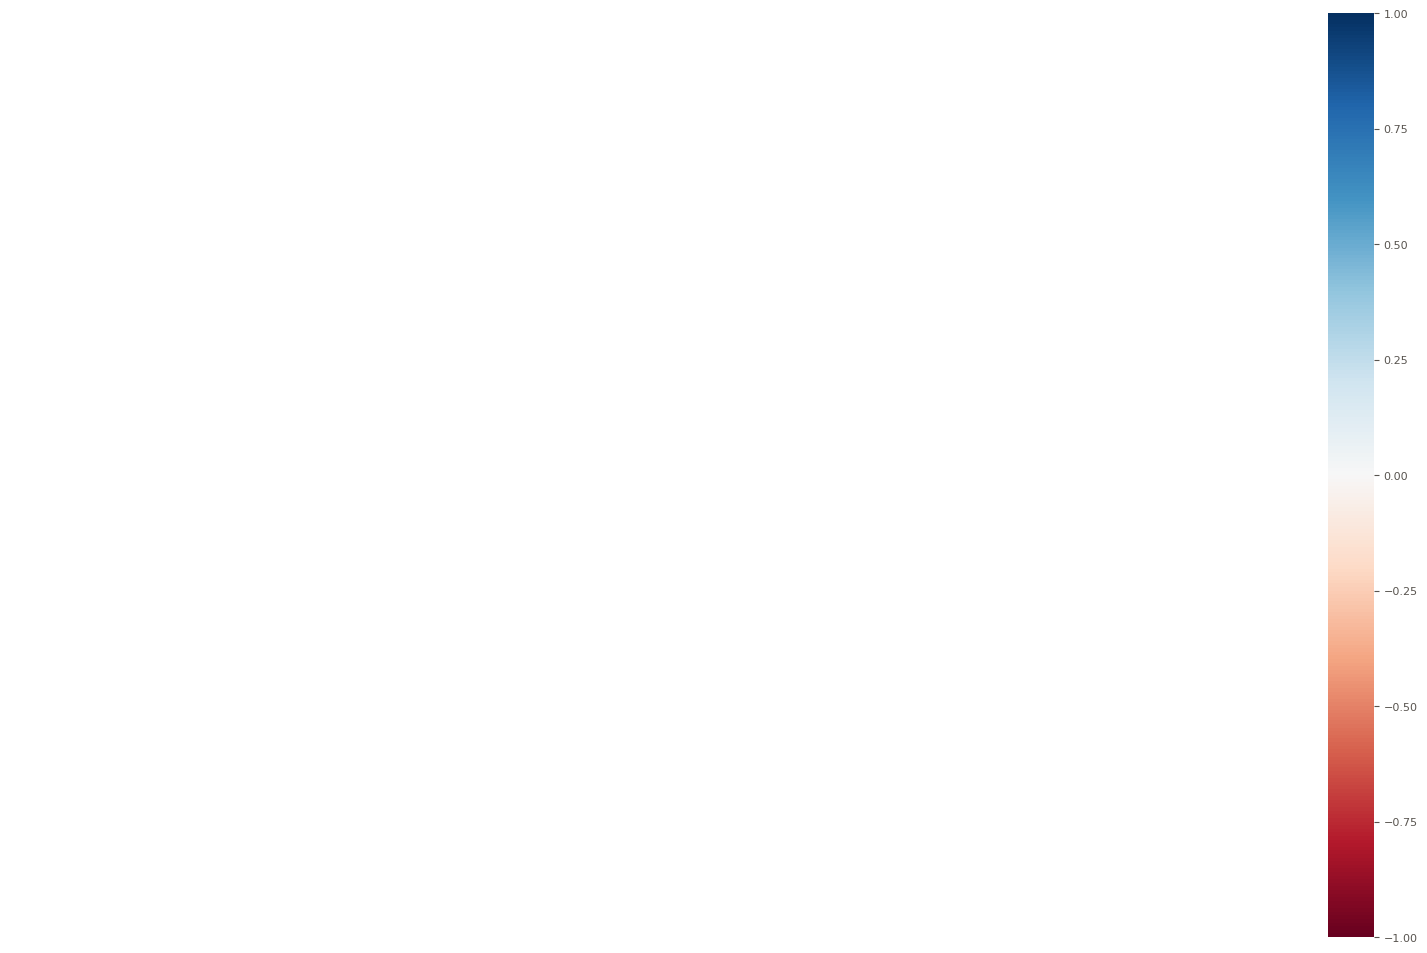

<Figure size 640x480 with 0 Axes>

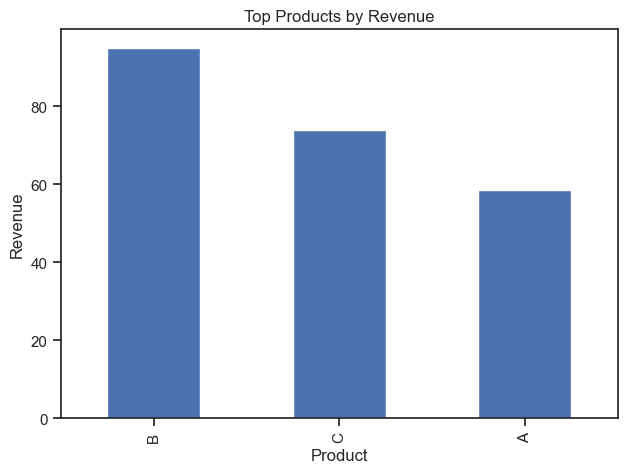

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
# Simple plot: top products by revenue (from Pandas result)
plt.figure()
df_top_pd.plot(x="product", y="Revenue", kind="bar", legend=False)
plt.title("Top Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()



<a id="integration"></a>

### Integration Project: E-commerce Sales Analytics

**Flow:** Database → Pandas → EDA → NumPy  
- Query transactions  
- Clean & feature engineering (`Revenue`)  
- EDA (distribution, trend, Pareto)  
- NumPy normalization & covariance


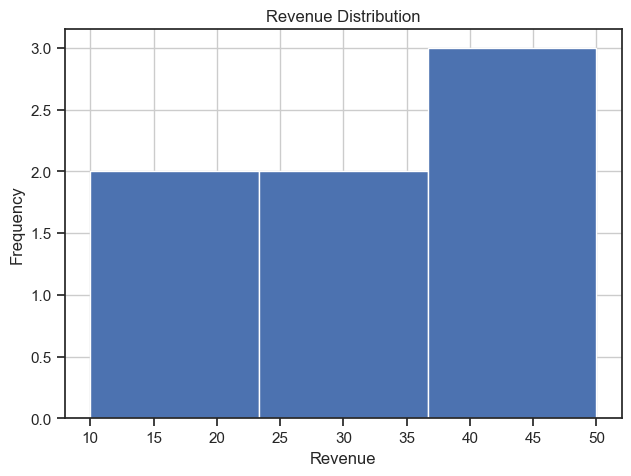

In [109]:
%matplotlib inline
# Query from SQLite (replace with MySQL connection in your environment)
df = pd.read_sql_query("SELECT product, quantity, price, discount, date FROM transactions", conn)
df["date"] = pd.to_datetime(df["date"])
df["Revenue"] = df["quantity"] * df["price"] * (1 - df["discount"])

# EDA: distribution
plt.figure()
df["Revenue"].hist(bins=3)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()



In [110]:

# NumPy: normalization & covariance on selected features
arr = df[["quantity","price","Revenue"]].to_numpy(dtype=float)
# avoid divide-by-zero
norms = np.linalg.norm(arr, axis=0, keepdims=True)
norms[norms==0] = 1.0
arr_norm = arr / norms
cov = np.cov(arr_norm.T)

print("Normalized (first 5 rows):\n", arr_norm[:5])
print("\nCovariance matrix:\n", cov)


Normalized (first 5 rows):
 [[0.20412415 0.14509525 0.10787512]
 [0.40824829 0.36273813 0.48543802]
 [0.61237244 0.14509525 0.30744408]
 [0.20412415 0.580381   0.43150046]
 [0.40824829 0.36273813 0.53937558]]

Covariance matrix:
 [[ 0.02380952 -0.01692425  0.00348649]
 [-0.01692425  0.03834586  0.0187826 ]
 [ 0.00348649  0.0187826   0.02326438]]



<a id="eda-manual"></a>

### EDA (Manual -Pandas + Matplotlib)

**Goals:**  
- Explore distributions, categories, correlations, outliers, and trends.


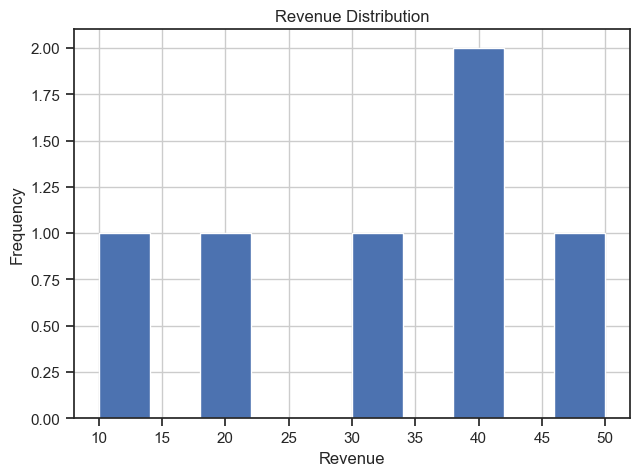

In [111]:
%matplotlib inline
# Distribution: histogram of revenue
plt.figure()
orders["revenue"].hist(bins=10)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


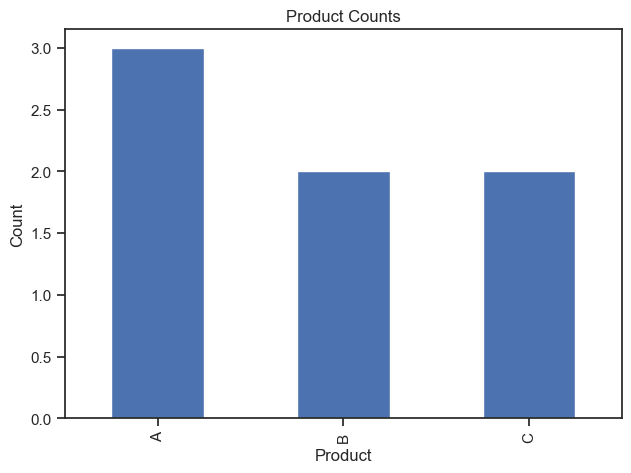

In [112]:
%matplotlib inline
# Categorical: product counts
plt.figure()
orders["product"].value_counts().plot(kind="bar")
plt.title("Product Counts")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()


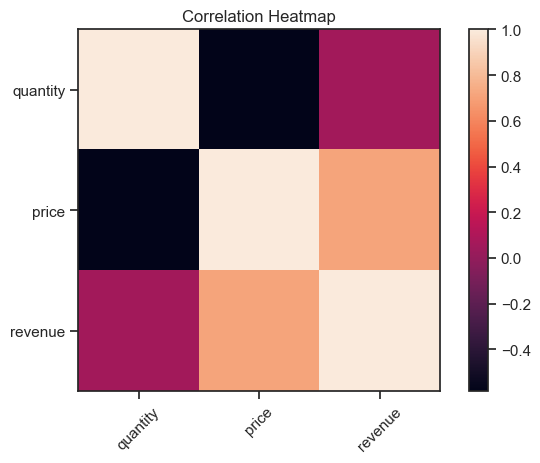

In [113]:
%matplotlib inline
# Correlation heatmap
corr = orders[["quantity","price","revenue"]].corr(numeric_only=True)
plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


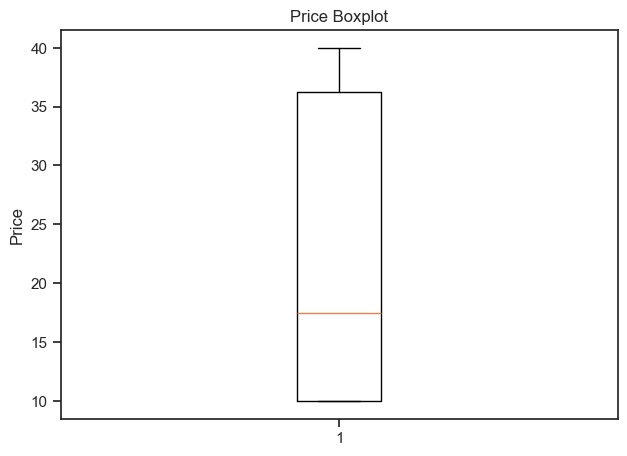

In [114]:
%matplotlib inline
# Outliers: boxplot of price
plt.figure()
plt.boxplot(orders["price"].dropna(), vert=True)
plt.title("Price Boxplot")
plt.ylabel("Price")
plt.show()


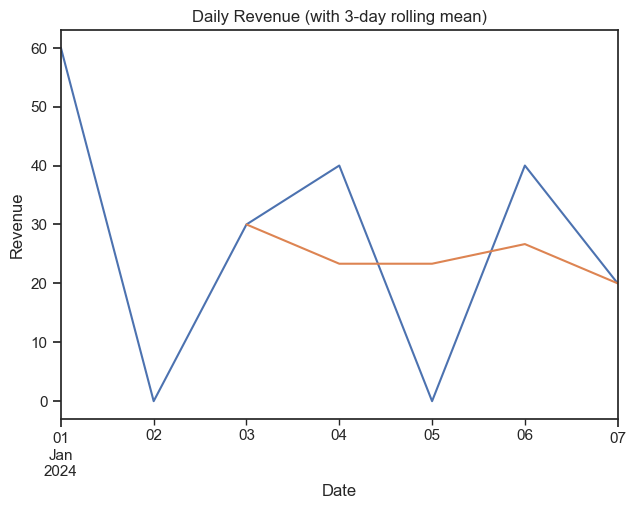

In [115]:
%matplotlib inline
# Trend: daily revenue + rolling mean
plt.figure()
ts.plot()
ts.rolling(3).mean().plot()
plt.title("Daily Revenue (with 3-day rolling mean)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


### Plots

#### matplotlib 

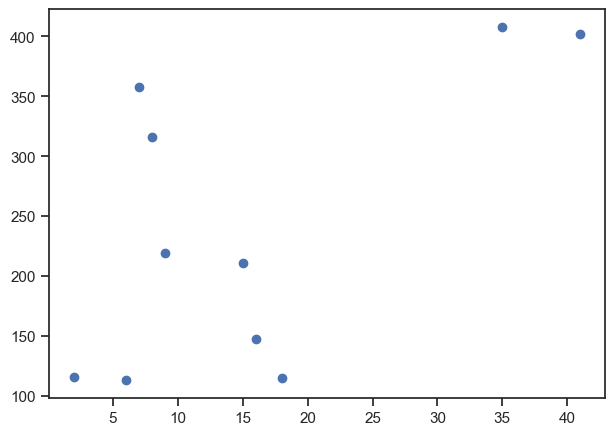

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
x = np.array(random.sample(range(1, 50), 10))
y = np.array(random.sample(range(100, 500), 10))

plt.scatter(x, y)
plt.show()

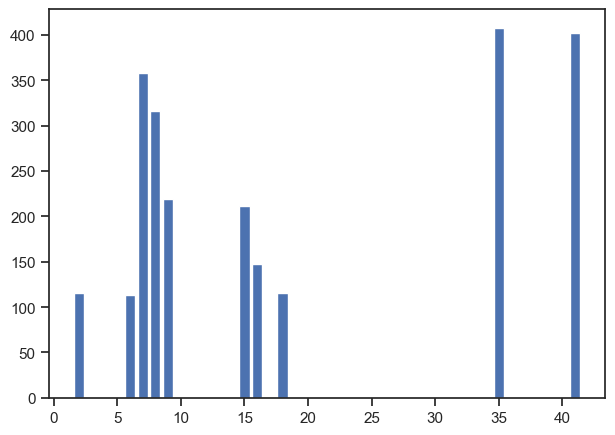

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random


plt.bar(x, y)
plt.show()

#### Plotly 

In [ ]:
#!pip install plotly[express]

In [119]:
import plotly.express as px
import random
x = np.array(random.sample(range(1, 50), 10))
y = np.array(random.sample(range(100, 500), 10))
fig = px.scatter(x=x, y=y)
fig.show()

In [120]:
import plotly.express as px
x = np.array(random.sample(range(1, 50), 10))
y = np.array(random.sample(range(100, 500), 10))
fig = px.bar(x=x, y=y)
fig.show()

#### Pandas Plots

### Diamond Prices Explorative data analysis
Data source: https://www.kaggle.com/shivam2503/diamonds


Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
- price price in US dollars (\$326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table width of top of diamond relative to widest point (43--95)

In [121]:
import kagglehub
import pandas as pd
import os
import zipfile
import shutil

def load_diamonds_dataset():
    # Ensure local_data exists
    os.makedirs("local_data", exist_ok=True)

    # Download latest version via kagglehub
    path = kagglehub.dataset_download("shivam2503/diamonds")
    print("Downloaded dataset path:", path)

    # Path to save the zip
    zip_path = "local_data/diamonds.zip"

    # Create a zip file from the dataset folder
    shutil.make_archive("local_data/diamonds", 'zip', path)

    print(f"Dataset compressed into: {zip_path}")

    # Read CSV directly from zip
    data = pd.read_csv(zip_path, index_col=0, compression="zip")
    print(f"Loaded {data.shape[0]}x{data.shape[1]} dataset")

    return data

# Example usage
data = load_diamonds_dataset()
print(data.head())


Downloaded dataset path: C:\Users\zvibe\.cache\kagglehub\datasets\shivam2503\diamonds\versions\1
Dataset compressed into: local_data/diamonds.zip
Loaded 53940x10 dataset
   carat   cut    color clarity  depth  table  price    x     y     z 
1  0.23     Ideal    E     SI2   61.5   55.0    326   3.95  3.98  2.43
2  0.21   Premium    E     SI1   59.8   61.0    326   3.89  3.84  2.31
3  0.23      Good    E     VS1   56.9   65.0    327   4.05  4.07  2.31
4  0.29   Premium    I     VS2   62.4   58.0    334   4.20  4.23  2.63
5  0.31      Good    J     SI2   63.3   58.0    335   4.34  4.35  2.75


#### Data Exploration size vs. price
##### Scatter plot
<img src="local_data/scatter_plots.png">

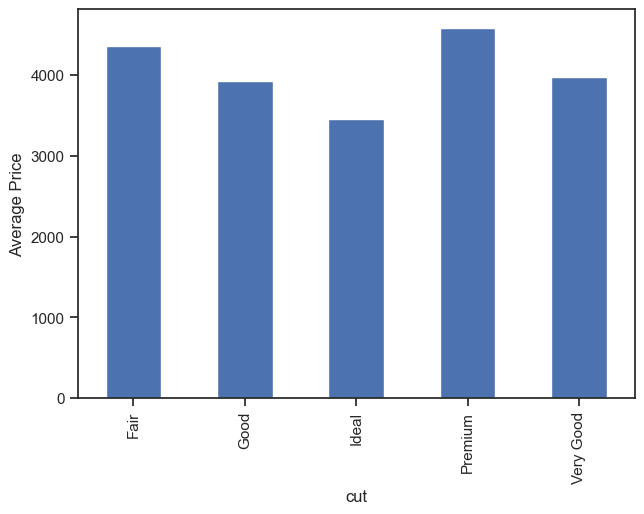

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
agg = data.groupby('cut')['price'].mean()

ax = agg.plot(kind='bar')   # now only one bar per unique 'cut'
ax.set_ylabel('Average Price')
plt.show()

<Axes: ylabel='Frequency'>

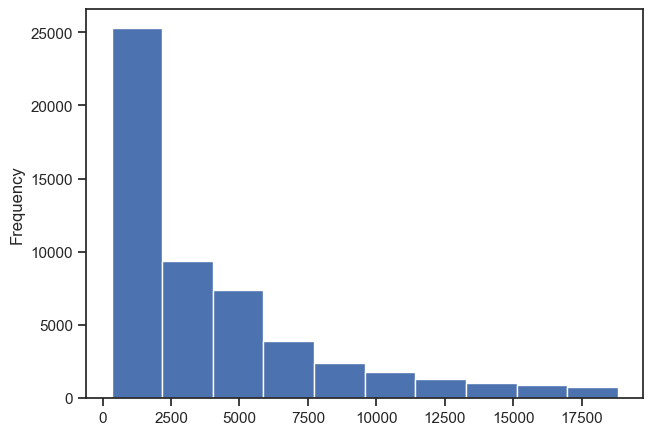

In [123]:
data['price'].plot(kind = 'hist')

In [124]:
#load the data
data = pd.read_csv('local_data/diamonds.zip', index_col=0)
print(f"Loaded {data.shape[0]}x{data.shape[1]}")
data.head()

Loaded 53940x10


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Data Exploration size vs. price
##### Scatter plot
<img src="local_data/scatter_plots.png">

In [125]:
%matplotlib inline
def plot_2vars(x, y):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    data = pd.DataFrame({'x': x, 'y': y})
    ax = data.plot.scatter(x='x', y='y', s=1, label=f"{data['x'].corr(data['y']):2.2f}", figsize=(12, 9))
    ax.legend()
    ax.set_xlabel('parameter 1')
    ax.set_ylabel('parameter 2')
    plt.show()  # <- this line shows the plot if you're in a script
    return ax

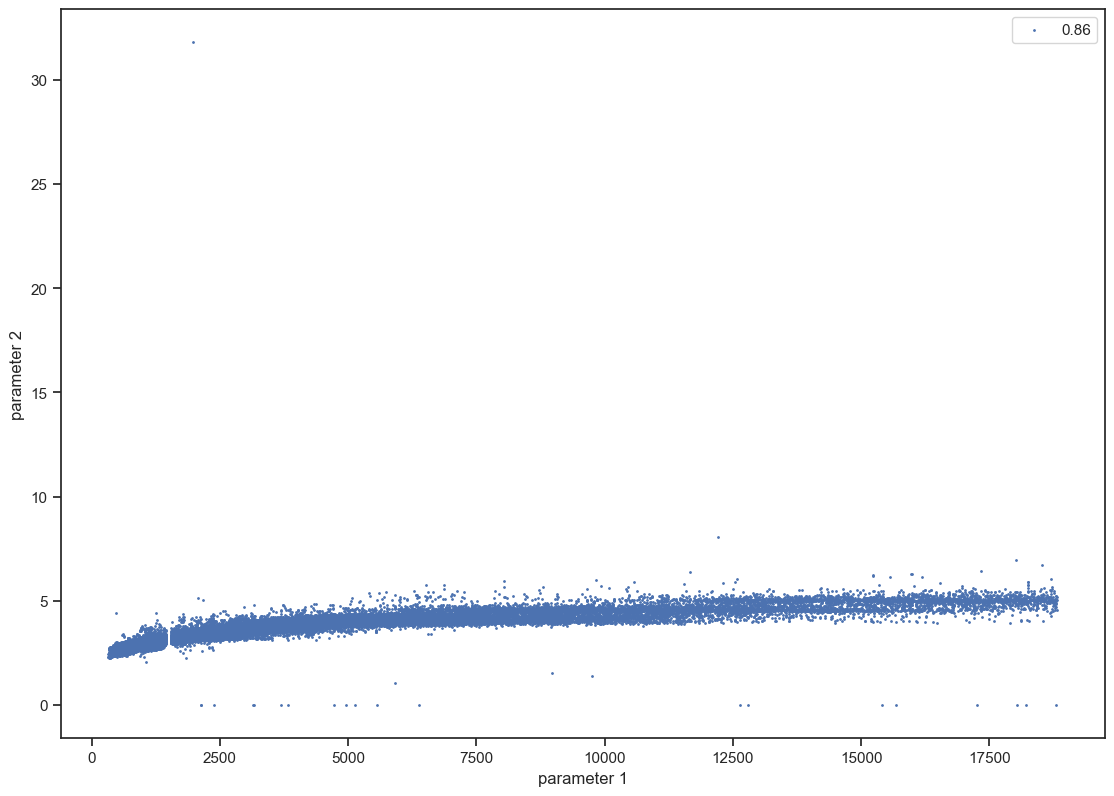

<Axes: xlabel='parameter 1', ylabel='parameter 2'>

In [126]:
plot_2vars(data['price'].values,data['z'])

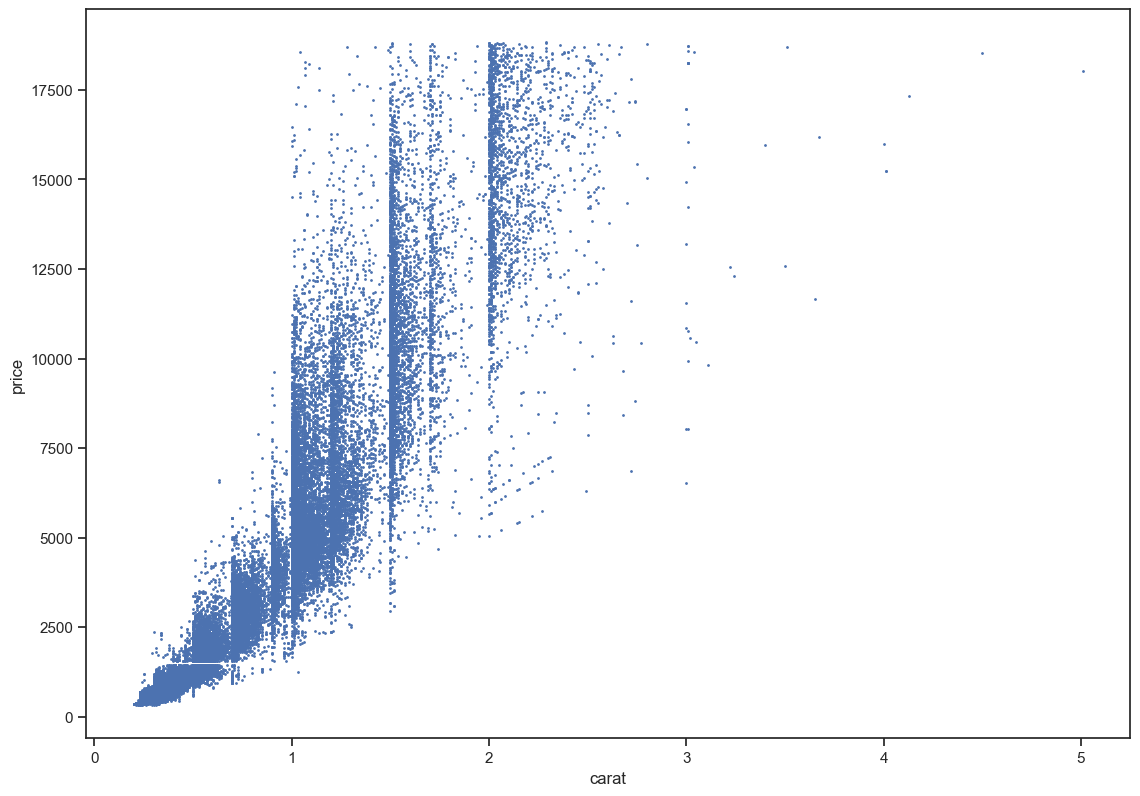

In [127]:
ax = data.plot.scatter(x='carat',y='price',s=1, figsize=(12,9))

#### Correlation
pearson correlation coefficient
$corr(X,Y)=\dfrac{1}{N}\sum_{i=1}^{N}{\dfrac{(x-{\mu}_x)}{{\sigma}_x}*\dfrac{(y-{\mu}_y)}{{\sigma}_y}}$<br>
- ${\mu}_x$ - expected value of the series $X$
- ${\sigma}_x$ - standard deviation, $${\sigma}_x = \sqrt{ \dfrac{1}{N-1}}\sum_{i=1}^{N}{(x_i-\mu_x)^2}$$
- $<...>$ - average

In [128]:
corr_coeff = data['carat'].corr(data['price'])
print(f'Pearson correlation coefficient: size vs. price: {corr_coeff:3.3f}')

Pearson correlation coefficient: size vs. price: 0.922


#### Reveal Functional Form

Text(0, 0.5, 'mean price')

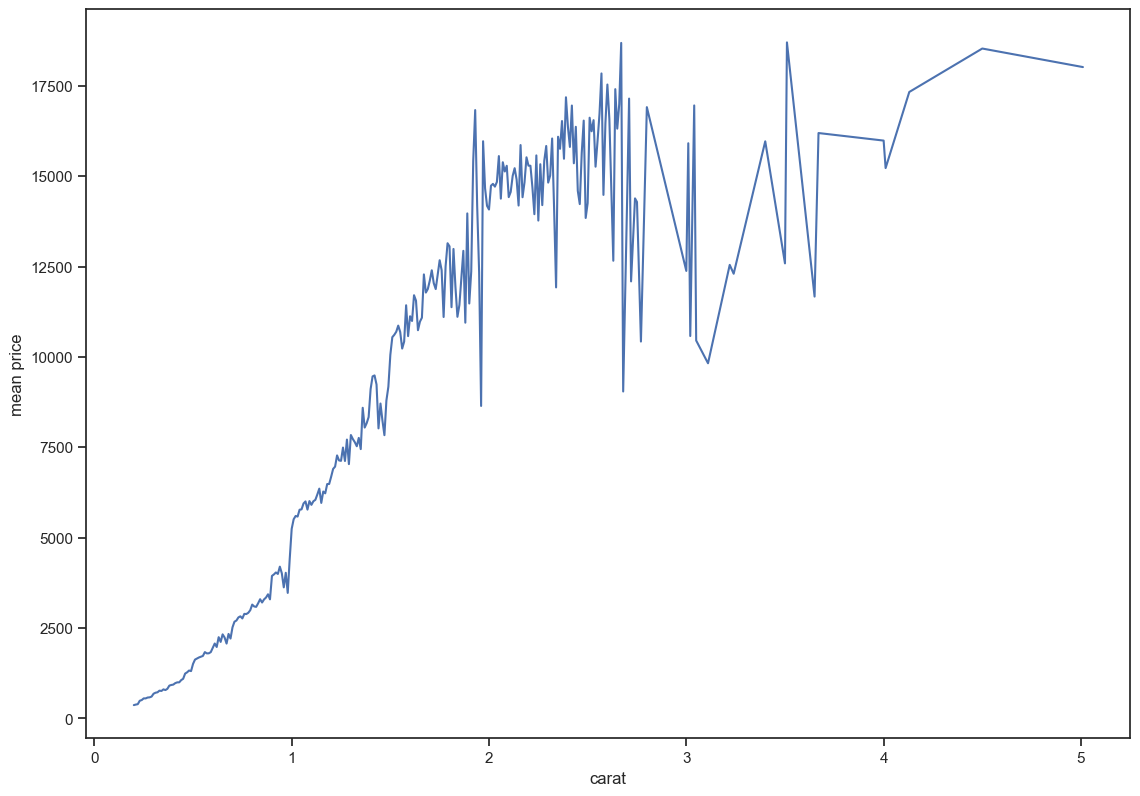

In [129]:
price_mean = data.groupby('carat')['price'].mean()
ax = price_mean.plot(figsize=(12,9))
ax.set_ylabel('mean price')

Issues:
- missing confidence intervals (std)
- noise in the tail

#### Compute mean and standard error vs standard deviation

- standard deviation, $${\sigma}_x = \sqrt{ \dfrac{1}{N-1}}\sum_{i=1}^{N}{(x_i-\mu_x)^2}$$
Represents how broad the distribution is
- standard error of the mean (SEM): confidence in the estimate of the mean. 
$SEM(x)=\dfrac{\sigma_x}{\sqrt{N}}$
assumes independence of the values in your sample


In [130]:
price_mean.head()

carat
0.20    365.166667
0.21    380.222222
0.22    391.400000
0.23    486.143345
0.24    505.185039
Name: price, dtype: float64

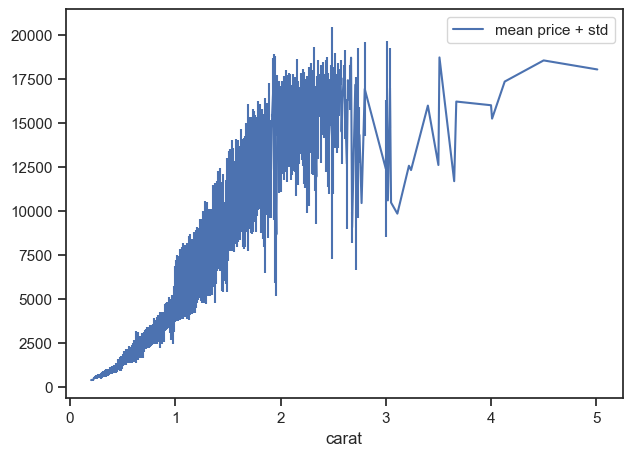

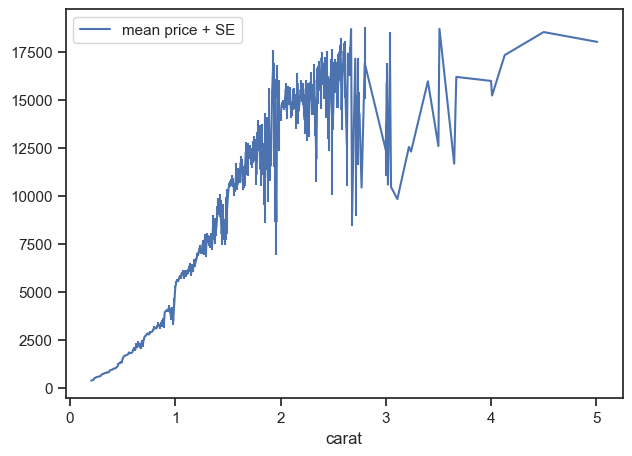

In [131]:
def SEM(x): # standard error of the mean
    import math  
    if math.sqrt(len(x))==0:
        return 0
    return x.std()/math.sqrt(len(x))

price_mean = data.groupby('carat').agg({'price':['mean', 'std', SEM]})

price_mean.plot(y=('price','mean'),yerr=price_mean[('price','std')], label='mean price + std');

price_mean.plot(y=('price','mean'),yerr=price_mean[('price','SEM')], label='mean price + SE');

#### Bin data 

##### Binning data linearly helps, but there's still noise in the tail

Text(0.5, 1.0, 'error: sem')

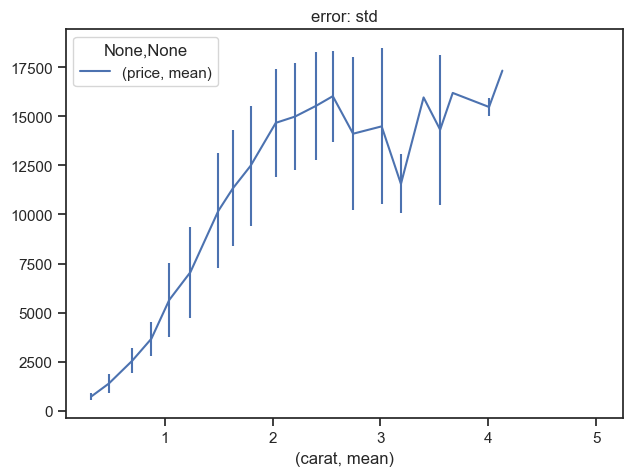

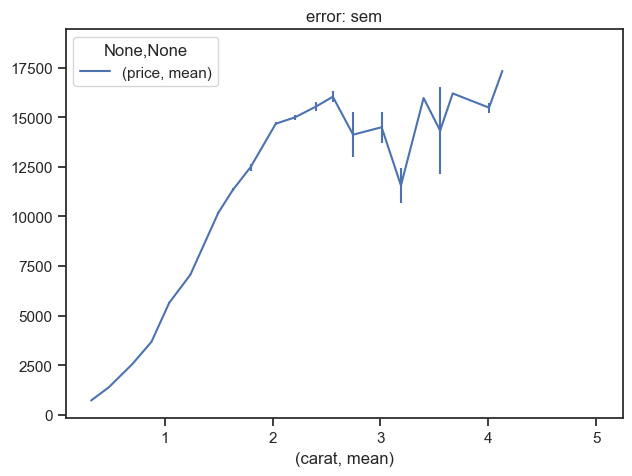

In [132]:
categories, bins = pd.cut(data['carat'], bins=25, retbins=True)
price_mean = data.groupby(categories, as_index=True).agg({'price':['mean', 'std', SEM], 'carat': 'mean'})
ax = price_mean.plot(x=('carat', 'mean'),y=('price','mean'),yerr=price_mean[('price','std')].values);
ax.set_title('error: std')
ax = price_mean.plot(x=('carat', 'mean'), y=('price','mean'),yerr=price_mean[('price','SEM')].values);
ax.set_title('error: sem')

##### diamond size distribution: very uneven 

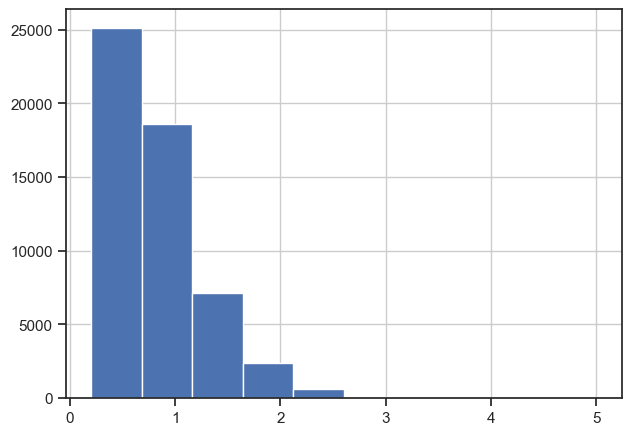

In [133]:
ax = data['carat'].hist()

##### bin using equally-populated bins. 
- <code>qcut</code>:    Quantile-based discretization function.

Text(0.5, 1.0, 'error: sem')

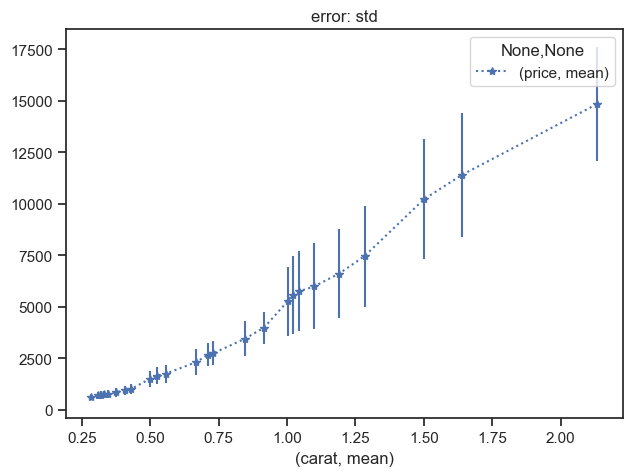

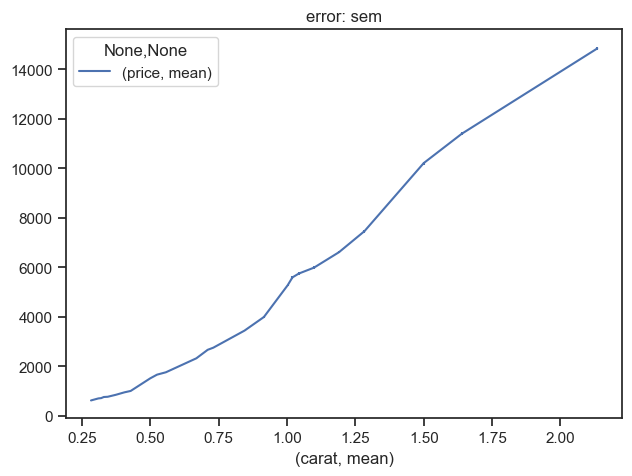

In [134]:
categories, bins = pd.qcut(data['carat'], q=25, retbins=True)
price_mean = data.groupby(categories, as_index=True).agg({'price':['mean', 'std', SEM], 'carat': 'mean'})
ax = price_mean.plot(x=('carat', 'mean'),y=('price','mean'),yerr=price_mean[('price','std')].values, linestyle=':', marker='*');
ax.set_title('error: std')
ax = price_mean.plot(x=('carat', 'mean'), y=('price','mean'),yerr=price_mean[('price','SEM')].values);
ax.set_title('error: sem')

In [135]:
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix)

         carat     depth     table     price       x         y         z   
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


#### Using seaborn

In [136]:
#!pip install seaborn

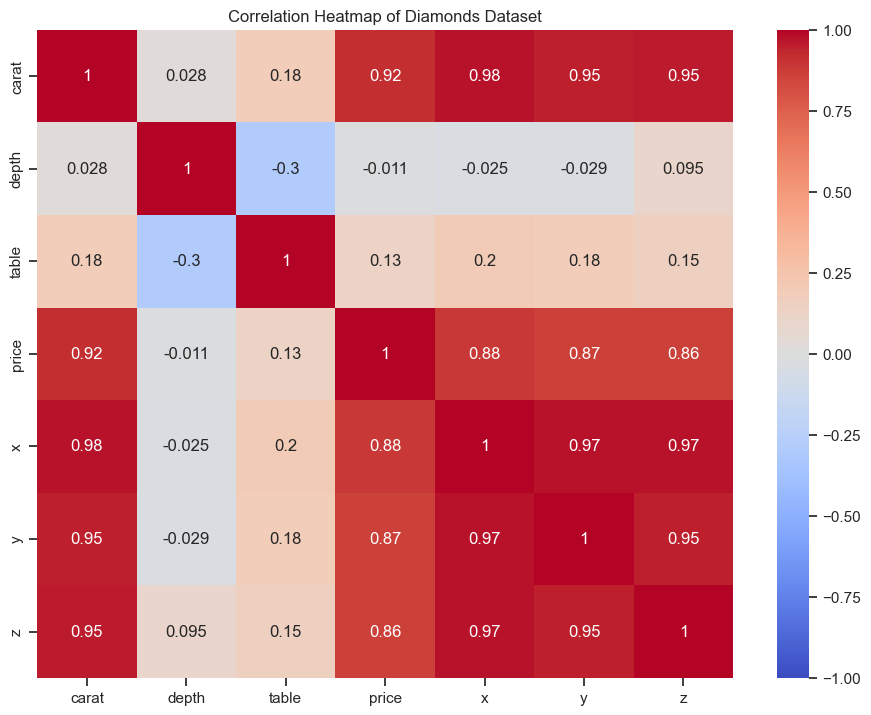

In [137]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Diamonds Dataset')
plt.show()


<a id="eda-auto"></a>

### Automatic EDA Tools

> These tools generate fast, comprehensive overviews. Use them for initial insights, then deep-dive manually.

**Packages Covered:**  
- `ydata-profiling` (formerly pandas-profiling)  
- `sweetviz`  
- `dtale`  
- `autoviz`  

> Install if missing:  
> `pip install ydata-profiling sweetviz dtale autoviz`


In [138]:

# ydata-profiling (pandas-profiling) — inline in notebook
from ydata_profiling import ProfileReport
try:
    from ydata_profiling import ProfileReport
    profile = ProfileReport(pd.DataFrame.from_dict(data), explorative=True, minimal=True)
    # In Jupyter: profile.to_notebook_iframe()
    # As a file (useful for sharing):
    profile.to_file("local_data/dimonds_profiling_report.html")
    print("Saved: dimonds_profiling_report.html")
except Exception as e:
    print("ydata-profiling not available or failed:", e)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 478.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Saved: dimonds_profiling_report.html


In [139]:
pd.DataFrame.from_dict(data)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [140]:

# Sweetviz — generates an interactive HTML
try:
    import sweetviz as sv
    report = sv.analyze(data)
    report.show_html("local_data/rders_sweetviz_report.html")
    print("Saved: orders_sweetviz_report.html")
except Exception as e:
    print("Sweetviz not available or failed:", e)


                                             |          | [  0%]   00:00 -> (? left)

Report local_data/rders_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Saved: orders_sweetviz_report.html


In [141]:

# D-Tale — interactive dataframe explorer (runs a local server)
# Uncomment to run in a local environment:
import dtale
d = dtale.show(data, ignore_duplicate=True)
d.open_browser()  # or use the returned URL
print("D-Tale demo commented out for safety in static environments.")


D-Tale demo commented out for safety in static environments.


In [142]:

# AutoViz — quick auto visualizations from CSV or DataFrame
try:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    _ = AV.AutoViz(
        filename="", dfte=data, depVar="revenue",
        header=0, verbose=0, lowess=False, chart_format="png",
        max_rows_analyzed=1500, max_cols_analyzed=50
    )
    print("AutoViz run completed (check generated charts above).")
except Exception as e:
    print("AutoViz not available or failed:", e)


    Since nrows is smaller than dataset, loading random sample of 1500 rows into pandas...
Shape of your Data Set loaded: (1500, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 1500 exceeds maximum, randomly sampling 1500 rows for EDA...
Could not find given target var in data set. Please check input
AutoViz not available or failed: not enough values to unpack (expected 11, got 8)



<a id="wrapup"></a>

## Wrap-up

- **MySQL/SQL** → where structured data lives.  
- **Pandas** → wrangling, analytics, and **manual EDA**.  
- **NumPy** → numerical backbone for fast math and matrix ops.  
- **Automatic EDA tools** → accelerators for first insights.  
- Together: Database → Pandas → EDA → NumPy → Modeling.
